In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import import_ipynb
import warnings
import Lib.Functions as fc
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
warnings.filterwarnings('ignore')

importing Jupyter notebook from /Users/vuhan/Desktop/JOHN/5. Machine Learning with Python/4. Practice/LDS6_269C7N5_ON_VuTranHoaiHan_FinalExam/Lib/Functions.ipynb


In [2]:
df = pd.read_excel('House_data.xlsx')
df.head()

,ID,Noi_dung,Dia_chi,Gia,Nha_ve_sinh,So_phong,Huong,Chieu_dai,Rong,Giay_to,Cau_truc,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien,Tien_ich,Duong,Phuong,Quan
0,149065,Bán nhà 134.7m2 Tân Hiệp Hóc Môn. Cách Đỗ Văn ...,"Đường ấp Thới Tây 2, Xã Tân Hiệp, Huyện Hóc Môn","3,7 tỷ 35,4 triệu/m²",4,3,Đ.Bắc,20.71,5.00,Sổ hồng,1 trệt + 1 lầu,104.5,134.7,5.0,0.0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên,...",Đường ấp Thới Tây 2,Xã Tân Hiệp,Huyện Hóc Môn
1,231326,Bán Nhà Nát Gần Mặt Tiền Đường Hậu Giang P11 Q...,"Đường Hậu Giang, Phường 11, Quận 6","3,9 tỷ 92,2 triệu/m²",1,--,Tây,12.90,3.00,Sổ hồng,1 trệt,42.3,87.7,6.1,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Di ...",Đường Hậu Giang,Phường 11,Quận 6
2,184984,Bán nhà riêng Quận Gò Vấp - Nhà còn mới phù hợ...,"Đường Nguyễn Thượng Hiền, Phường 1, Quận Gò Vấp",2 tỷ 99 triệu/m²,2,--,T.Nam,3.20,4.65,Sổ hồng,"1 trệt, 1 lửng",20.2,150,3.0,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Gầ...",Đường Nguyễn Thượng Hiền,Phường 1,Quận Gò Vấp
3,205270,"Bán Nhà Hẻm Đường Huỳnh Tấn Phát, xã Phú Xuân ...","Đường Huỳnh Tấn Phát, Xã Phú Xuân, Huyện Nhà Bè","3,8 tỷ 52,9 triệu/m²",2,2,Đ.Bắc,14.35,5.00,Sổ hồng,1 trệt + 1 lầu,71.8,137.6,5.0,0.0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên...",Đường Huỳnh Tấn Phát,Xã Phú Xuân,Huyện Nhà Bè
4,307136,"Bán Nhà Hẻm 3m Lò Siêu, DT: 5,2x10m, Trệt Lửng...","Đường Lò Siêu, Phường 16, Quận 11","6,5 tỷ 124,8 triệu/m²",5,5,T.Nam,10.00,5.20,Sổ hồng,"1 trệt, 1 lửng, 1 tầng thượng + 2 lầu",52.1,70.3,0.0,5.0,NaN,Đường Lò Siêu,Phường 16,Quận 11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4386 non-null   int64  
 1   Noi_dung           4386 non-null   object 
 2   Dia_chi            4386 non-null   object 
 3   Gia                4386 non-null   object 
 4   Nha_ve_sinh        4386 non-null   object 
 5   So_phong           4386 non-null   object 
 6   Huong              4386 non-null   object 
 7   Chieu_dai          4386 non-null   float64
 8   Rong               4386 non-null   float64
 9   Giay_to            4386 non-null   object 
 10  Cau_truc           4386 non-null   object 
 11  Dien_tich          4386 non-null   object 
 12  Dien_tich_su_dung  4386 non-null   object 
 13  Hem_rong           4386 non-null   float64
 14  Duong_mat_tien     4386 non-null   float64
 15  Tien_ich           3551 non-null   object 
 16  Duong              4386 

- Ta sẽ xây dựng một số bộ biến đổi tuỳ chỉnh để tiền xử lý dữ liệu và xây dựng Pipeline:

1. Lọc và xoá bỏ nhiễu trong input

In [4]:
class FilterNoise(BaseEstimator, TransformerMixin):
    def __init__(self, col, drop_lst):
        self.col = col
        self.drop_lst = drop_lst
    def fit(self, X, y = None):
        return self
    def transform(self, df):
        X = df.copy()
        X[self.col] = X[self.col].str.lower().str.strip()
        idx_noise = []
        for item in self.drop_lst:
            idx = X.loc[X[self.col].map(lambda x: item in x)].index.tolist()
            for item in idx:
                idx_noise.append(item)
        X.drop(idx_noise, inplace = True)
        return X

2. Tiền xử lý output (tách giá trị, fill dữ liệu thiếu, xoá bỏ nhiễu, ..)

In [5]:
class OutputProcessing(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col = col
    def fit(self, df, y = None):
        return self
    def transform(self, df):
        X = df.copy()
        X[self.col] = X[self.col].str.strip()
        idx_drop1 = X.loc[X[self.col].map(lambda x: x.split()[1] == 'triệu')].index
        X.drop(idx_drop1, inplace = True)
        idx_drop2 = X.loc[X[self.col].map(lambda x: x.split()[3] != 'triệu/m²')].index
        X.drop(idx_drop2, inplace = True)
        idx_replace = X.loc[X[self.col].map(lambda x: x.split()[1] != 'tỷ')].index
        X['Gia_ban'] = X[self.col].map(lambda x: x.split()[0].replace(',', '.'))
        X['Gia_m2'] = X[self.col].map(lambda x: x.split()[2].replace(',', '.'))
        X.loc[idx_replace, 'Gia_ban'] = np.nan
        X.drop(self.col, axis = 1, inplace = True)
        return X

3. Tiền xử lý các features: `Dien_tich, Dien_tich_su_dung`

In [6]:
class CleaningUsingArea(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
    def fit(self, X, y = None):
        return self
    def transform(self, df):
        X = df.copy()
        for col in self.cols:
            if X.dtypes[col] == object:
                idx_drop = X.loc[X[col].str.isnumeric() == False].index
                X.drop(idx_drop, inplace = True)
        return X

4. Chuyển đôit kiểu dữ liệu các features

In [7]:
class ConvertDtype(BaseEstimator, TransformerMixin):
    def __init__(self, lst_col):
        self.lst_col = lst_col
    def fit(self, df, y = None):
        return self
    def transform(self, df):
        X = df.copy()
        for col in self.lst_col:
            X[col] = X[col].astype(float)
        return X

5. Nội suy giá trị thiếu của một features từ các features liên quan

In [8]:
class FillnaValue(BaseEstimator, TransformerMixin):
    def __init__(self, target, col1, col2):
        self.target = target
        self.col1 = col1
        self.col2 = col2
    def fit(self, X, y = None):
        return self
    def transform(self, df):
        X = df.copy()
        idx_null = X.loc[X[self.target].isnull()].index
        X.loc[idx_null, self.target] = round((X.loc[idx_null, self.col1] * X.loc[idx_null, self.col2]) / 1000, 2)
        X[self.target] = X[self.target] * 1000
        return X

6. Biến đổi cột dữ liệu `Cau_truc`

In [9]:
class ConstructTransform(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col = col
    def fit(self, X, y = None):
        return self
    def transform(self, df):
        X = df.copy()
        X[self.col] = X[self.col].str.strip()
        idx_drop = X.loc[X[self.col].map(lambda x: '22 lầu' in x or '--' in x)].index.tolist()
        X.drop(idx_drop, inplace = True)
        X['0_lau'] = X[self.col].map(lambda x: 1 if 'lầu' not in x else 0)
        X['1_lau'] = X[self.col].map(lambda x: 1 if '1 lầu' in x else 0)
        X['2_lau'] = X[self.col].map(lambda x: 1 if '2 lầu' in x else 0)
        X['3_lau'] = X[self.col].map(lambda x: 1 if '3 lầu' in x else 0)
        X['4_lau'] = X[self.col].map(lambda x: 1 if '4 lầu' in x else 0)
        X['5_lau'] = X[self.col].map(lambda x: 1 if '5 lầu' in x else 0)
        X['6_lau'] = X[self.col].map(lambda x: 1 if '6 lầu' in x else 0)
        X['7_lau'] = X[self.col].map(lambda x: 1 if '7 lầu' in x else 0)
        X['Tang_thuong'] = X[self.col].map(lambda x: 1 if 'tầng thượng' in x else 0)
        X['Tang_ham'] = X[self.col].map(lambda x: 1 if 'tầng hầm' in x else 0)
        X['Tang_lung'] = X[self.col].map(lambda x: 1 if 'lửng' in x or 'áp mái' in x or 'gác suốt' in x else 0)
        X.drop(self.col, axis = 1, inplace = True)
        return X

7. Xoá bỏ các cột trong `DataFrame`

In [10]:
class DataFrameDroping(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
    def fit(self, X, y = None):
        return self
    def transform(self, df):
        X = df.copy()
        X.drop(self.cols, axis = 1, inplace = True)
        return X

8. Xoá bỏ các giá trị tuỳ chọn trong cột trong `DataFrame`

In [11]:
class DropingValue(BaseEstimator, TransformerMixin):
    def __init__(self, col, value):
        self.col = col
        self.value = value
    def fit(self, X, y = None):
        return self
    def transform(self, df):
        X = df.copy()
        idx_drop = X.loc[X[self.col] >= self.value].index
        X.drop(idx_drop, inplace = True)
        return X

9. Encode các categorical features trong `DataFrame`

In [12]:
class EncoderCatColumns(BaseEstimator, TransformerMixin):
    import pandas as pd
    def __init__(self):
        return None
    def fit(self, X, y = None):
        return self
    def transform(self, df):
        X = df.copy()
        cat = [col for col in X.columns if X.dtypes[col] == object]
        X_new = pd.get_dummies(data = X, columns = cat)
        return X_new

10. Nội suy các giá trị nhiễu từ các cột có liên quan

In [13]:
class FillRelateValue(BaseEstimator, TransformerMixin):
    def __init__(self, target, col1, col2):
        self.target = target
        self.col1 = col1
        self.col2 = col2
    def fit(self, X, y = None):
        return self
    def transform(self, df):
        X = df.copy()
        idx_replace = X.loc[X[self.target].str.isnumeric() == False].index
        X.loc[idx_replace, self.target] = X.loc[idx_replace, self.col1] * X.loc[idx_replace, self.col2]
        return X

- Ta sẽ tiền xử lý dữ liệu, loại bỏ những cột không cần thiết và quan sát giá trị của các features:

In [14]:
from sklearn.pipeline import Pipeline

preprocessing = Pipeline([('0', FilterNoise('Noi_dung', ['biệt thự', 'dãy nhà trọ', 'dãy phòng trọ', 
                                                            'dãy trọ', 'nhà trọ', 'lô đất', 'nhà và đất', 
                                                            '7 căn', '2 căn', 'khu đô thị', 'toà nhà văn phòng', 
                                                            'tòa nhà văn phòng', 'khách sạn', 'nhà xưởng', 
                                                            'bán tầng', 'toà nhà', 'tòa nhà','shophouse', 
                                                            'phòng trọ', 'kho xưởng', '6 căn'])),
                          ('1', OutputProcessing('Gia')),
                          ('2', CleaningUsingArea(['Dien_tich', 'Dien_tich_su_dung'])),
                          ('3', ConvertDtype(['Gia_ban', 'Gia_m2', 'Dien_tich', 'Dien_tich_su_dung'])),
                          ('4', FillnaValue('Gia_ban', 'Gia_m2', 'Dien_tich')),
                          ('5', ConstructTransform('Cau_truc')),
                          ('6', DataFrameDroping(['ID', 'Dia_chi','Tien_ich', 'Nha_ve_sinh', 'Noi_dung', 'Huong',
                                                    'So_phong', 'Duong', 'Giay_to', 'Phuong']))])

In [15]:
df_process = preprocessing.fit_transform(df)

- Phân tích các biến liên tục trong dữ liệu đã tiền xử lý:

----- Chieu_dai -----
count    4162.000000
mean       14.074094
std         6.455977
min         1.000000
25%         9.760000
50%        13.245000
75%        17.500000
max       101.460000
Name: Chieu_dai, dtype: float64
* Median: 13.245000000000001
* Skewness: 1.7333529445016154
* Kurtosis: 11.22696297438021
* Percentage of outliers: 0.02426717924074964
* Number of missing value: 0


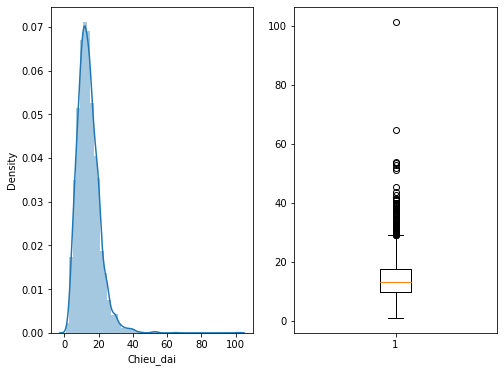


----- Rong -----
count    4162.000000
mean        4.519985
std         1.932075
min         0.750000
25%         3.500000
50%         4.000000
75%         5.000000
max        30.340000
Name: Rong, dtype: float64
* Median: 4.0
* Skewness: 3.7482096415518997
* Kurtosis: 24.58057835567597
* Percentage of outliers: 0.06871696299855838
* Number of missing value: 0


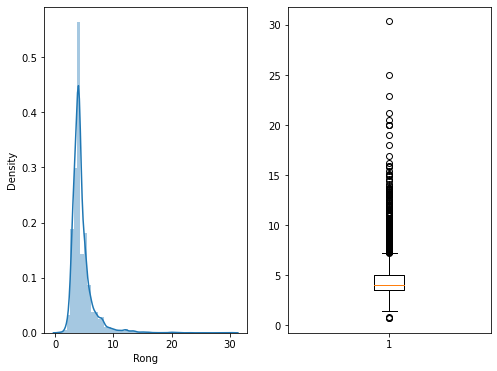


----- Dien_tich -----
count    4162.000000
mean       63.764584
std        48.058824
min         7.500000
25%        36.000000
50%        53.300000
75%        77.250000
max       724.600000
Name: Dien_tich, dtype: float64
* Median: 53.3
* Skewness: 4.334797731470058
* Kurtosis: 35.793329422481584
* Percentage of outliers: 0.04925516578567996
* Number of missing value: 0


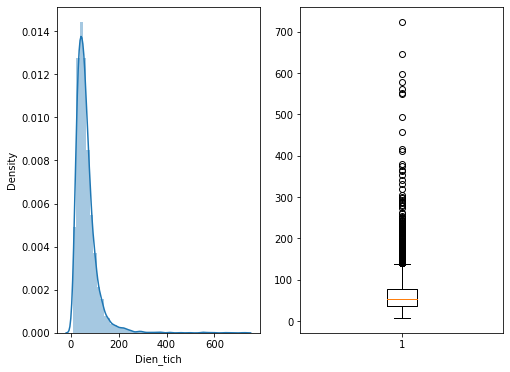


----- Dien_tich_su_dung -----
count    4162.000000
mean      132.703380
std        98.689735
min         1.469000
25%        67.500000
50%       108.400000
75%       172.650000
max       990.000000
Name: Dien_tich_su_dung, dtype: float64
* Median: 108.4
* Skewness: 2.890111521612861
* Kurtosis: 15.110570673600552
* Percentage of outliers: 0.03315713599231139
* Number of missing value: 0


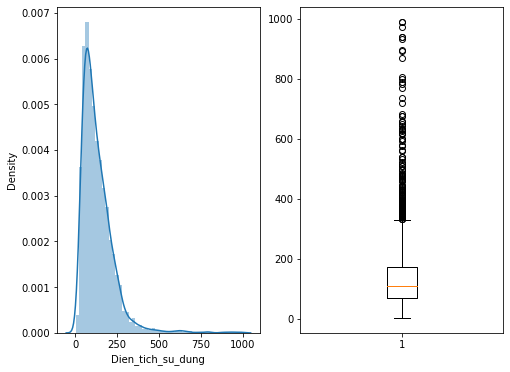


----- Hem_rong -----
count    4162.000000
mean        3.124792
std         2.492314
min         0.000000
25%         1.700000
50%         3.000000
75%         4.500000
max        32.000000
Name: Hem_rong, dtype: float64
* Median: 3.0
* Skewness: 1.4998456574239436
* Kurtosis: 9.501828430344343
* Percentage of outliers: 0.02114368092263335
* Number of missing value: 0


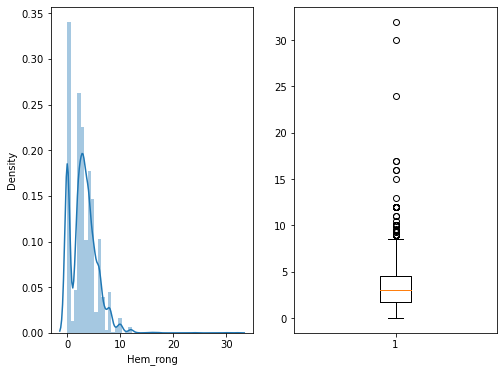


----- Duong_mat_tien -----
count    4162.000000
mean        2.958626
std         6.400921
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        60.000000
Name: Duong_mat_tien, dtype: float64
* Median: 0.0
* Skewness: 2.9082880205492425
* Kurtosis: 11.761157981285283
* Percentage of outliers: 0.23690533397405095
* Number of missing value: 0


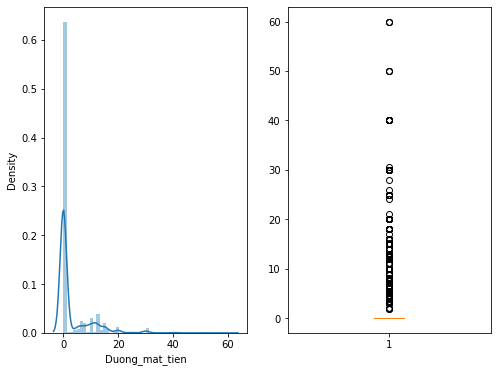


----- Gia_ban -----
count      4162.000000
mean       8015.274387
std        6889.184995
min        1050.000000
25%        3970.000000
50%        6000.000000
75%        9500.000000
max      101000.000000
Name: Gia_ban, dtype: float64
* Median: 6000.0
* Skewness: 3.5174691537424563
* Kurtosis: 22.420316527840185
* Percentage of outliers: 0.06967803940413263
* Number of missing value: 0


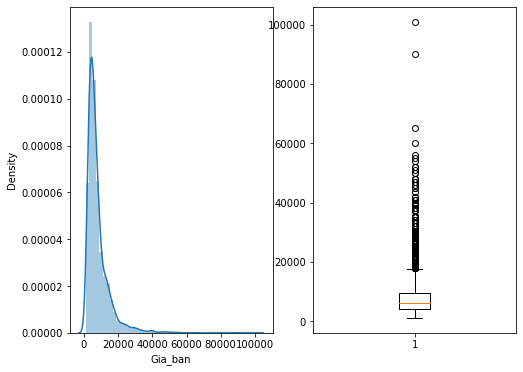


----- Gia_m2 -----
count    4162.000000
mean      138.785127
std        84.775221
min         9.300000
25%        85.100000
50%       117.600000
75%       169.675000
max       814.700000
Name: Gia_m2, dtype: float64
* Median: 117.6
* Skewness: 2.2247617053585977
* Kurtosis: 7.874227805104634
* Percentage of outliers: 0.04853435848149928
* Number of missing value: 0


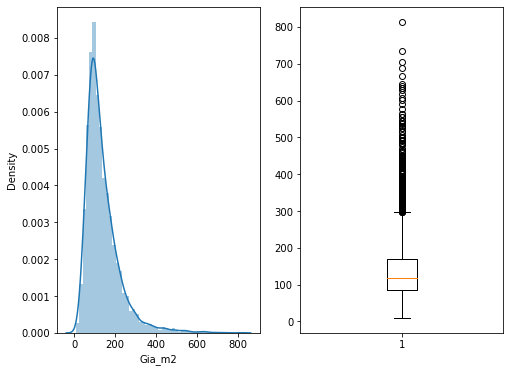


----- 0_lau -----
count    4162.000000
mean        0.151129
std         0.358218
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 0_lau, dtype: float64
* Median: 0.0
* Skewness: 1.9487495853800891
* Kurtosis: 1.7984889582981447
* Percentage of outliers: 0.15112926477654973
* Number of missing value: 0


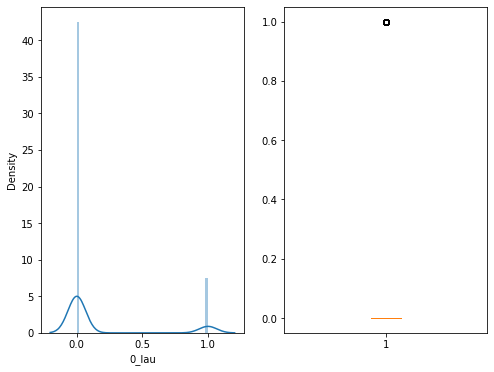


----- 1_lau -----
count    4162.000000
mean        0.358722
std         0.479683
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: 1_lau, dtype: float64
* Median: 0.0
* Skewness: 0.5893315559964496
* Kurtosis: -1.6534831099730567
* Percentage of outliers: 0.0
* Number of missing value: 0


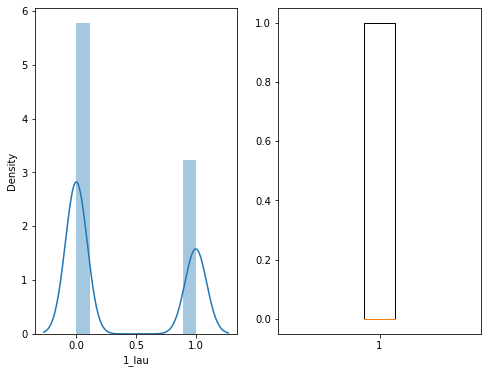


----- 2_lau -----
count    4162.000000
mean        0.364008
std         0.481209
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: 2_lau, dtype: float64
* Median: 0.0
* Skewness: 0.5654831974445053
* Kurtosis: -1.6810367868700966
* Percentage of outliers: 0.0
* Number of missing value: 0


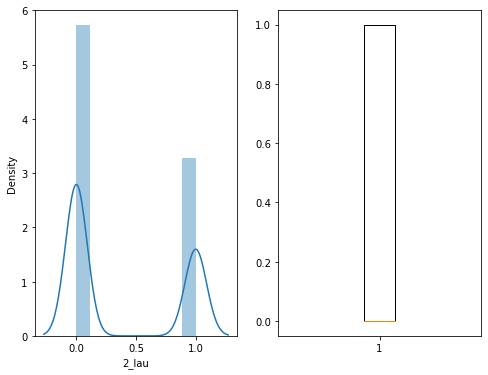


----- 3_lau -----
count    4162.000000
mean        0.105959
std         0.307822
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 3_lau, dtype: float64
* Median: 0.0
* Skewness: 2.561422848262669
* Kurtosis: 4.563079510910133
* Percentage of outliers: 0.1059586737145603
* Number of missing value: 0


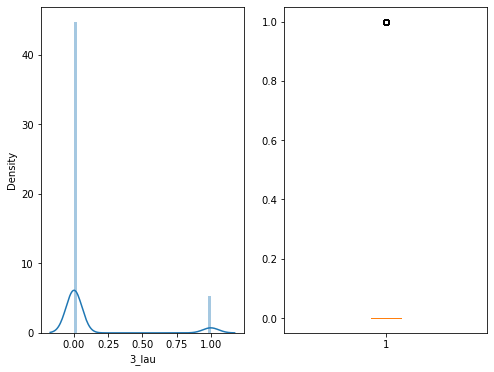


----- 4_lau -----
count    4162.000000
mean        0.015617
std         0.124005
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 4_lau, dtype: float64
* Median: 0.0
* Skewness: 7.816051789006491
* Kurtosis: 59.11907431446146
* Percentage of outliers: 0.01561749159058145
* Number of missing value: 0


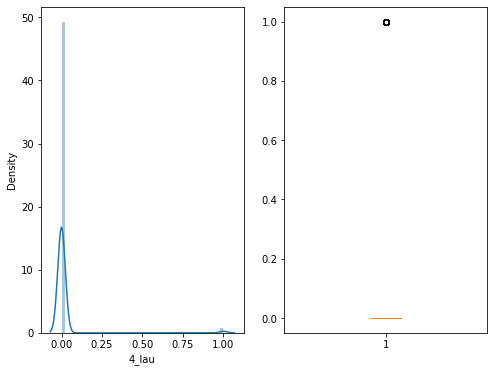


----- 5_lau -----
count    4162.000000
mean        0.003604
std         0.059933
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 5_lau, dtype: float64
* Median: 0.0
* Skewness: 16.573118317336178
* Kurtosis: 272.79934104965986
* Percentage of outliers: 0.0036040365209034117
* Number of missing value: 0


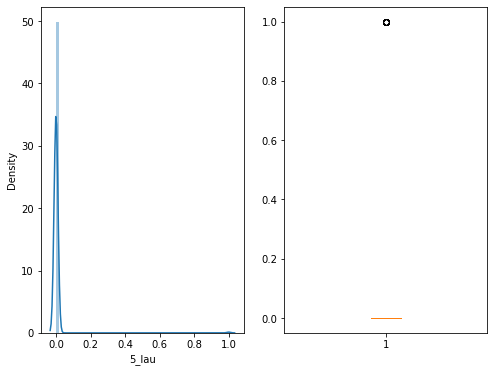


----- 6_lau -----
count    4162.000000
mean        0.000721
std         0.026841
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 6_lau, dtype: float64
* Median: 0.0
* Skewness: 37.22005551413495
* Kurtosis: 1383.9975960385832
* Percentage of outliers: 0.0007208073041806823
* Number of missing value: 0


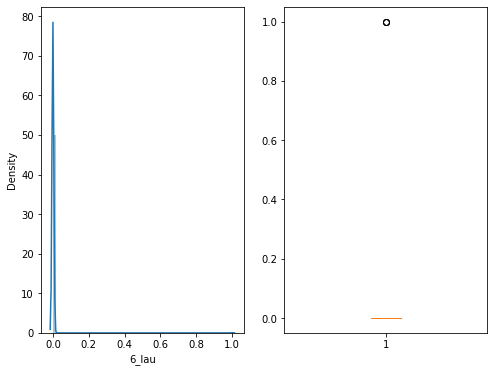


----- 7_lau -----
count    4162.000000
mean        0.000240
std         0.015501
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 7_lau, dtype: float64
* Median: 0.0
* Skewness: 64.51356446515726
* Kurtosis: 4162.000000000003
* Percentage of outliers: 0.0002402691013935608
* Number of missing value: 0


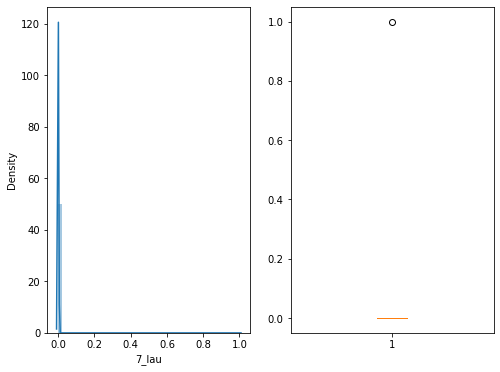


----- Tang_thuong -----
count    4162.000000
mean        0.277751
std         0.447944
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Tang_thuong, dtype: float64
* Median: 0.0
* Skewness: 0.9927842722906668
* Kurtosis: -1.0148673022305792
* Percentage of outliers: 0.0
* Number of missing value: 0


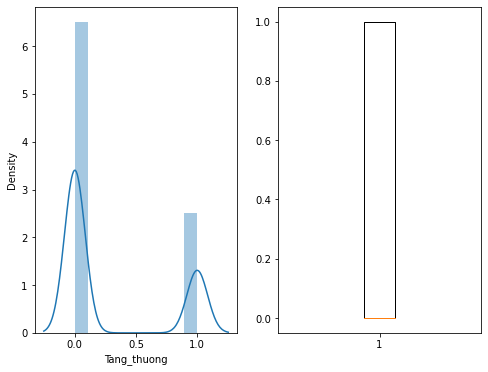


----- Tang_ham -----
count    4162.000000
mean        0.005526
std         0.074142
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Tang_ham, dtype: float64
* Median: 0.0
* Skewness: 13.345052912649077
* Kurtosis: 176.17509588416016
* Percentage of outliers: 0.005526189332051898
* Number of missing value: 0


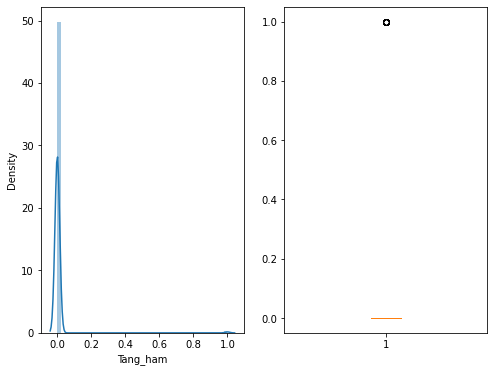


----- Tang_lung -----
count    4162.000000
mean        0.251562
std         0.433963
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Tang_lung, dtype: float64
* Median: 0.0
* Skewness: 1.1455254262398422
* Kurtosis: -0.6881023883337245
* Percentage of outliers: 0.0
* Number of missing value: 0


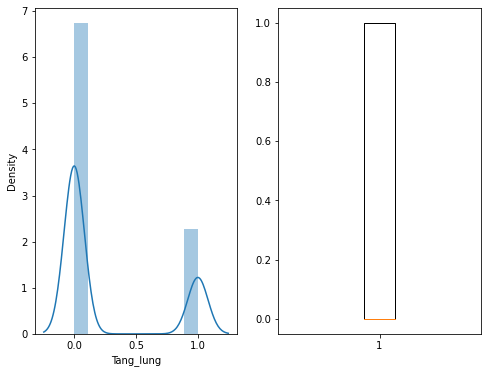

In [16]:
cont = fc.numbers_variable(df_process)
for col in cont:
    fc.continuous_analysis(df_process, col)

*Nhận xét:*

- Vì dữ liệu bài toán quá nhỏ, outliers ở các features khá nhiều nên ta sẽ giả định bài toán dự đoán giá nhà này cho đối tượng nhà ở trung bình, loại đi các yếu tố giá nhà biệt thự, nhà trọ, đất, nhà xưởng, vv, dữ liệu sử dụng để huấn luyện mô hình được xử lý trong pipeline đầy đủ sau:

In [17]:
from sklearn.pipeline import Pipeline

full_preprocessing = Pipeline([('0', FilterNoise('Noi_dung', ['biệt thự', 'dãy nhà trọ', 'dãy phòng trọ', 
                                                            'dãy trọ', 'nhà trọ', 'lô đất', 'nhà và đất', 
                                                            '7 căn', '2 căn', 'khu đô thị', 'toà nhà văn phòng', 
                                                            'tòa nhà văn phòng', 'khách sạn', 'nhà xưởng', 
                                                            'bán tầng', 'toà nhà', 'tòa nhà','shophouse', 
                                                            'phòng trọ', 'kho xưởng', '6 căn'])),
                          ('1', OutputProcessing('Gia')),
                          ('2', CleaningUsingArea(['Dien_tich', 'Dien_tich_su_dung'])),
                          ('3', ConvertDtype(['Gia_ban', 'Gia_m2', 'Dien_tich', 'Dien_tich_su_dung'])),
                          ('4', FillnaValue('Gia_ban', 'Gia_m2', 'Dien_tich')),
                          ('5', ConstructTransform('Cau_truc')),
                          ('6', DataFrameDroping(['ID', 'Dia_chi','Tien_ich', 'Nha_ve_sinh', 'Noi_dung', 'Huong',
                                                    'So_phong', 'Duong', 'Giay_to', 'Phuong'])),
                          ('7', DataFrameDroping(['Gia_m2'])),
                          ('8', EncoderCatColumns())])

In [18]:
df_new = full_preprocessing.fit_transform(df)

- Ta sẽ không tách dữ liệu này ra thành hai tập là tập huấn luyện và tập kiểm tra, nên ta sẽ viết một hàm tính trung binh điểm số RMSE trên 5 fold kiểm định chéo:

In [19]:
def eval_cross_rmse(model, X, y, cv = 5):
    import numpy as np
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_squared_error
    scores = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = cv)
    rmse_scores = np.sqrt(-scores)
    print('* Scores RMSE: {}'.format(rmse_scores))
    print('* Mean RMSE: {}'.format(round(rmse_scores.mean(), 2)))
    print('* Std RMSE: {}'.format(round(rmse_scores.std(), 2)))

In [20]:
X = df_new.drop('Gia_ban', axis = 1)
y = df_new['Gia_ban']

- Ta sẽ bắt đầu với các thuật toán trong lớp `ensemble`:

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 150, random_state = 42)
forest.fit(X, y)

RandomForestRegressor(n_estimators=150, random_state=42)

In [22]:
forest.score(X, y)

0.9532271776650744

In [23]:
forest_score = cross_val_score(forest, X, y)
forest_score

array([0.64005243, 0.67215086, 0.68134212, 0.61737902, 0.64035441])

In [24]:
forest_score.mean()

0.6502557700862451

In [25]:
eval_cross_rmse(forest, X, y)

* Scores RMSE: [4013.97559534 3884.89805878 3855.78460437 4614.00283614 3982.03051455]
* Mean RMSE: 4070.14
* Std RMSE: 278.2


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
tree_base = DecisionTreeRegressor(random_state = 42)

ada_reg = AdaBoostRegressor(tree_base, n_estimators = 200, learning_rate = 0.5, random_state = 42)
ada_reg.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                  learning_rate=0.5, n_estimators=200, random_state=42)

In [27]:
ada_reg.score(X, y)

0.999557202775628

In [28]:
ada_score = cross_val_score(ada_reg, X, y)
ada_score

array([0.63771459, 0.6661401 , 0.60182692, 0.60508906, 0.63201833])

In [29]:
ada_score.mean()

0.6285577997317304

In [30]:
eval_cross_rmse(ada_reg, X, y)

* Scores RMSE: [4026.98977757 3920.34901535 4310.09045338 4687.51909432 4027.91511955]
* Mean RMSE: 4194.57
* Std RMSE: 278.35


In [31]:
from sklearn.ensemble import ExtraTreesRegressor

trees = ExtraTreesRegressor(n_estimators = 350, random_state = 42)
trees.fit(X, y)

ExtraTreesRegressor(n_estimators=350, random_state=42)

In [32]:
trees.score(X, y)

0.9999988209883667

In [33]:
trees_score = cross_val_score(trees, X, y)
trees_score

array([0.67517437, 0.72286993, 0.6812009 , 0.62546999, 0.68694651])

In [34]:
trees_score.mean()

0.6783323399775781

In [35]:
eval_cross_rmse(trees, X, y)

* Scores RMSE: [3813.11803215 3571.77775903 3856.63892607 4564.95793065 3715.15118148]
* Mean RMSE: 3904.33
* Std RMSE: 344.5


In [36]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state = 42)
xgb_reg.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
xgb_reg.score(X, y)

0.9788514532809856

In [38]:
xgb_score = cross_val_score(xgb_reg, X, y)
xgb_score

array([0.69062345, 0.71348317, 0.62310681, 0.67467195, 0.69469462])

In [39]:
xgb_score.mean()

0.6793160018125244

In [40]:
eval_cross_rmse(xgb_reg, X, y)

* Scores RMSE: [3721.33528104 3631.76443646 4193.3351936  4254.5557737  3668.88791797]
* Mean RMSE: 3893.98
* Std RMSE: 271.61


- Ta sẽ lựa chọn hai thuật toán cho kết quả RMSE khả quan nhất để tạo thành bộ hồi quy biểu quyết:

In [41]:
import time
from sklearn.ensemble import VotingRegressor

trees_reg = ExtraTreesRegressor(n_estimators = 350, random_state = 42)
xgb_reg = xgb.XGBRegressor(random_state = 42)

named_estimators = [
                    ('trees_reg', trees_reg),
                    ('xgb_reg', xgb_reg)]

voting_reg = VotingRegressor(named_estimators)
t1 = time.time()
voting_reg.fit(X, y)
t2 = time.time()

print('VotingRegressor training took {:.2f}s.'.format(t2 - t1))

VotingRegressor training took 5.25s.


In [42]:
voting_reg.score(X, y)

0.9947119262993062

In [43]:
voting_score = cross_val_score(voting_reg, X, y)
voting_score

array([0.70438704, 0.7458464 , 0.66859621, 0.66765765, 0.71667873])

In [44]:
voting_score.mean()

0.7006332077410014

In [45]:
eval_cross_rmse(voting_reg, X, y)

* Scores RMSE: [3637.61589475 3420.50900982 3932.14180017 4300.17678053 3534.3275904 ]
* Mean RMSE: 3764.95
* Std RMSE: 317.01


- Ta sẽ đánh giá pipeline tiền xử lý và mô hình dự đoán trên tập kiểm tra:

In [46]:
df_test = pd.read_excel('House_test.xlsx')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            1458 non-null   int64  
 1   Noi_dung                      1458 non-null   object 
 2   Dia_chi                       1458 non-null   object 
 3   Gia (tỷ - dùng để đánh giá )  1458 non-null   float64
 4   Nha_ve_sinh                   1458 non-null   object 
 5   So_phong                      1458 non-null   object 
 6   Huong                         1458 non-null   object 
 7   Chieu_dai                     1458 non-null   float64
 8   Rong                          1458 non-null   float64
 9   Giay_to                       1458 non-null   object 
 10  Cau_truc                      1458 non-null   object 
 11  Dien_tich                     1458 non-null   object 
 12  Dien_tich_su_dung             1458 non-null   float64
 13  Hem

In [47]:
test_processing  = Pipeline([('1', FillRelateValue('Dien_tich', 'Chieu_dai', 'Rong')),
                             ('2', ConvertDtype(['Dien_tich'])),
                             ('3', DataFrameDroping(['ID', 'Noi_dung', 'Dia_chi', 'Nha_ve_sinh', 
                                                     'So_phong', 'Huong', 'Duong', 'Giay_to', 'Tien_ich', 
                                                     'Phuong'])),
                             ('4', ConstructTransform('Cau_truc')),
                             ('5', EncoderCatColumns())])

In [48]:
df_test = test_processing.fit_transform(df_test)

In [49]:
df_test.shape

(1458, 40)

In [50]:
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0] * 1000

In [51]:
df_predictions = pd.DataFrame({'Actual_values': y_test,
                               'Prediction_values': voting_reg.predict(X_test)})
df_predictions

,Actual_values,Prediction_values
0,3800.0,4357.487500
1,11000.0,11425.155818
2,78000.0,6938.706215
3,5050.0,6261.284933
4,3900.0,4097.274501
...,...,...
1453,7900.0,6459.594510
1454,6000.0,6795.910317
1455,5100.0,5588.940053
1456,47000.0,25435.408906


- Hàm đánh giá mô hình hồi quy trong thư viện Lib

----- REGRESSION MODEL PERFORMANCE IN TEST-----
* R-squared model of Test: 0.5756
* MSE of output and predicted: 35972868.33782604
* RMSE of output and predicted: 5997.738601992091
* MAE of output and predicted: 2334.554778772855


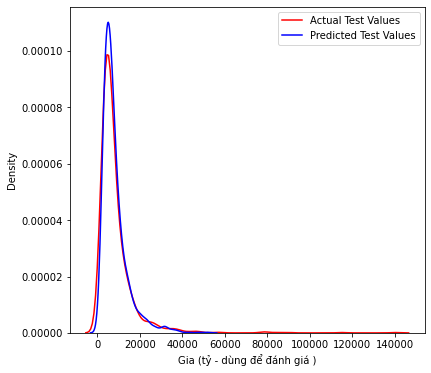

In [52]:
fc.eval_regression_testset(voting_reg, X_test, y_test)

- Giá trị RMSE trên tập kiểm tra là ~ 5 tỷ 997 triệu.

In [53]:
fc.save_model(voting_reg, 'VuTranHoaiHan_Housing_predict.pkl')